In [56]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

## Merging 12 months data into single Dataframe

In [57]:
df = pd.read_csv("./Sales_data/Sales_April_2019.csv")

In [58]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [59]:
files = [file for file in os.listdir('./Sales_data')]
    
merged_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_data/'+file)
    merged_df = pd.concat([merged_df,df])

merged_df.to_csv("All_Sales_Data.csv",index=False)



### Data Cleaning to remove NaN

In [61]:
#Filtering out the NaN rows
nan_df = merged_df[merged_df.isna().any(axis=1)]
nan_df.head()
merged_df = merged_df.dropna()
merged_df = merged_df.reset_index(drop=True)
merged_df.isna().sum().sum()

0

### Cleaning wrong month entries like 'Or'

In [69]:
clean_df = (merged_df[merged_df['Order Month']!='Or']).reset_index()

In [70]:
clean_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [73]:
clean_df['Quantity Ordered'] = pd.to_numeric(clean_df['Quantity Ordered'])
clean_df['Price Each'] = pd.to_numeric(clean_df['Price Each'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             185950 non-null  int64  
 1   Order ID          185950 non-null  object 
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Order Month       185950 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 10.6+ MB


### Q1: What was the best month for Sales? How much money was earned in that month?

####Adding Month column to merged_df

In [71]:
clean_df['Order Month'] = clean_df['Order Date'].str[0:2]
clean_df['Order Month'] = clean_df['Order Month'].astype('int32')

In [72]:
clean_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Adding Sales Column

In [74]:
clean_df['sales'] = clean_df['Quantity Ordered'] * clean_df['Price Each']

In [75]:
clean_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [79]:
clean_df.groupby('Order Month').sum()

,index,Quantity Ordered,Price Each,sales
Order Month,,,,
1,1373337075,10903,1.811768e+06,1.822257e+06
2,591716524,13449,2.188885e+06,2.202022e+06
3,953802351,17005,2.791208e+06,2.807100e+06
4,625641721,20558,3.367671e+06,3.390670e+06
5,1503117760,18667,3.135125e+06,3.152607e+06
6,2431706892,15253,2.562026e+06,2.577802e+06
7,2366671984,16072,2.632540e+06,2.647776e+06
8,916971145,13448,2.230345e+06,2.244468e+06
9,1772156634,13109,2.084992e+06,2.097560e+06


In [78]:
results = clean_df.groupby('Order Month').sum()

## 12th Month - best month for sales and value as shown above

### Visualising results using matplotlib

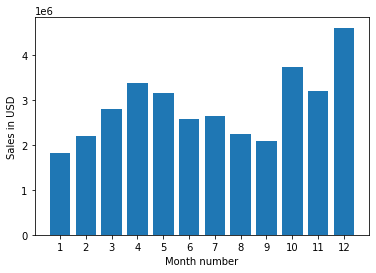

In [82]:
import matplotlib.pyplot as plt
x = range(1,13)
plt.bar(x,results['sales'])
plt.xticks(x)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

### Q2: What City had the highest number of Sales?

#### Adding a City column

In [89]:
clean_df['City'] = clean_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
clean_df['State_Pincode'] = clean_df['Purchase Address'].apply(lambda x: x.split(',')[-1].strip())
clean_df['State'] = clean_df['State_Pincode'].apply(lambda x: x.split(' ')[0])
clean_df['Pincode'] = clean_df['State_Pincode'].apply(lambda x: x.split(' ')[1])
clean_df.drop(columns='State_Pincode',inplace=True)

In [90]:
clean_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,State,Pincode
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,10001
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,10001
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,10001
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,94016
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,30301


In [93]:
clean_df['City_State'] = clean_df['City'] + ' ' + clean_df['State']
clean_df.groupby(['City_State']).sum()

,index,Quantity Ordered,Price Each,Order Month,sales
City_State,,,,,
Atlanta GA,1386728530,16602,2.779908e+06,104794,2.795499e+06
Austin TX,922962435,11153,1.809874e+06,69829,1.819582e+06
Boston MA,1857727115,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,1382407151,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,2762212932,33289,5.421435e+06,208325,5.452571e+06
New York City NY,2309234810,27932,4.635371e+06,175741,4.664317e+06
Portland ME,230497202,2750,4.471893e+05,17144,4.497583e+05
Portland OR,928407190,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,4170063870,50239,8.211462e+06,315520,8.262204e+06


In [97]:
results2 = clean_df.groupby(['City_State']).sum()

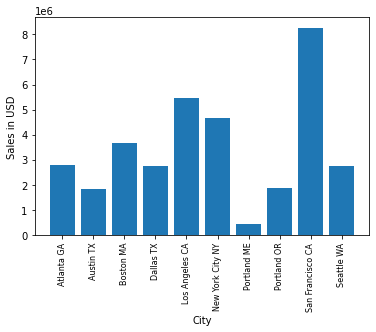

In [100]:
import matplotlib.pyplot as plt

cities = [city for city,df in clean_df.groupby('City_State')]

plt.bar(cities,results2['sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

### San Francisco CA has the highest sales

### Q3: What time should we display advertisements to maximise likelihood of customers buying the product?

In [101]:
clean_df['Order Date'] = pd.to_datetime(clean_df['Order Date'], format='%m/%d/%y %H:%M')

In [104]:
clean_df['Hour'] = clean_df['Order Date'].dt.hour
clean_df['Minute'] = clean_df['Order Date'].dt.minute
clean_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,State,Pincode,City_State,Hour,Minute
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,10001,New York City NY,0,1
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,10001,New York City NY,7,3
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,10001,New York City NY,18,21
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,94016,San Francisco CA,15,13
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,30301,Atlanta GA,12,38


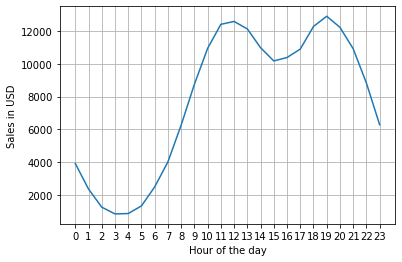

In [125]:
hours = [hour for hour,df in clean_df.groupby('Hour')]

plt.plot(hours, clean_df.groupby('Hour').count()['sales'])
plt.xticks(hours)
plt.ylabel('Sales in USD')
plt.xlabel('Hour of the day')
plt.grid()
plt.show()

### Between 11 AM - 12 PM & 7PM & 8 PM would be good times to advertise

### Q4: What products are most often sold together

In [115]:
new_df = clean_df[clean_df['Order ID'].duplicated(keep=False)]
new_df.head(10)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,State,Pincode,City_State,Hour,Minute
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,MA,02215,Boston MA,12,37
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,MA,02215,Boston MA,12,37
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,MA,02215,Boston MA,12,37
19,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,MA,02215,Boston MA,12,37
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,NY,10001,New York City NY,14,32
37,37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City,NY,10001,New York City NY,14,32
42,42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,TX,73301,Austin TX,12,27
43,43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,TX,73301,Austin TX,12,27
66,66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,MA,02215,Boston MA,14,49
67,67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston,MA,02215,Boston MA,14,49


In [116]:
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
new_df.head()

<ipython-input-116-9b89b1aaf017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City,State,Pincode,City_State,Hour,Minute,Grouped
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,MA,02215,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,MA,02215,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,MA,02215,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,MA,02215,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,NY,10001,New York City NY,14,32,"Vareebadd Phone,USB-C Charging Cable"


In [118]:
new_df = new_df[['Order ID','Grouped']].drop_duplicates()
new_df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [121]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(5):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


### iPhone & Lightning Charging Cable are the items that are sold together the maximum times

### Q5: What product sold the most? Why do you think it sold the most?

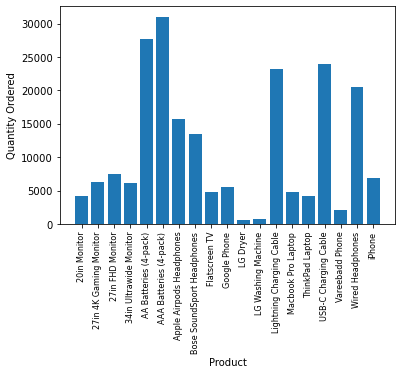

In [122]:
product = clean_df.groupby('Product')
quantity_ordered = product.sum()['Quantity Ordered']

products = [prod for prod,df in product]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

<ipython-input-124-487aa321f17b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


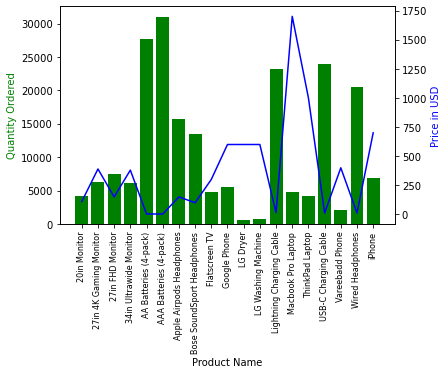

In [124]:
prices = clean_df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

### AAA batteries sold the most. In general, batteries are needed to power any electrical device & are cheap as well